In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv("results/fpkms.all_groups.tsv", sep="\t", index_col=0)
dat.head()

,Ad_Br_Fe,Ad_Br_Ma,Ad_Ey_Fe,Ad_Ey_Ma,Ad_Gi_Fe,Ad_Gi_Ma,Ad_Go_Fe,Ad_Go_Ma,Ad_He_Fe,Ad_He_Ma,...,Ad_St_Ma,Ju_Br_Mi,Ju_Ey_Mi,Ju_Gi_Mi,Ju_Go_Mi,Ju_He_Mi,Ju_In_Mi,Ju_Ki_Mi,Ju_Li_Mi,Ju_Mu_Mi
GeneID,,,,,,,,,,,,,,,,,,,,,
abl2,2.256521,1.925558,2.781183,2.395351,9.875788,2.818788,8.092579,3.980338,1.694431,1.838901,...,2.895857,1.886183,7.197182,10.837047,2.833092,1.871590,1.239274,1.970756,0.399389,0.500562
soat1,2.392571,3.454524,0.803461,1.211381,0.363799,0.513220,6.646222,1.838533,0.171823,0.210814,...,68.334612,5.153960,1.677690,0.118124,1.366823,0.016943,0.360609,0.983695,0.000000,0.016411
dnttip2,4.742001,3.903420,4.962518,2.872238,6.399140,5.069499,14.415564,6.022341,5.676184,7.550802,...,3.111963,2.472780,5.686459,5.846749,6.401608,3.624636,2.175484,8.264904,7.519040,3.998696
spata6_agbl4,3.254716,3.734259,3.006632,2.771479,0.574307,0.368005,0.653523,24.306386,0.540164,0.825272,...,0.379357,4.274557,0.713651,0.347984,2.189504,0.157406,0.288481,1.327739,0.714326,0.060245
spata6,0.241802,0.302351,0.303582,0.251037,0.379777,0.570247,0.089388,2.229303,0.684611,0.809908,...,0.550692,0.401132,0.293119,1.117530,0.664033,0.399145,0.276341,0.271549,0.068205,0.023550


In [3]:
groups = [
    'Ju_Br_Mi', 'Ad_Br_Ma', 'Ad_Br_Fe', 
    'Ju_Ey_Mi', 'Ad_Ey_Ma', 'Ad_Ey_Fe',
    'Ju_Gi_Mi', 'Ad_Gi_Ma', 'Ad_Gi_Fe',
    'Ju_Go_Mi', 'Ad_Go_Ma', 'Ad_Go_Fe',
    'Ju_He_Mi', 'Ad_He_Ma', 'Ad_He_Fe',
    'Ju_In_Mi', 'Ad_In_Ma', 'Ad_In_Fe',
    'Ju_Ki_Mi', 'Ad_Ki_Ma', 'Ad_Ki_Fe',
    'Ju_Li_Mi', 'Ad_Li_Ma', 'Ad_Li_Fe',
    'Ju_Mu_Mi', 'Ad_Mu_Ma', 'Ad_Mu_Fe',
    'Ad_Pi_Ma', 'Ad_Pi_Fe',
    'Ad_Sp_Ma', 'Ad_Sp_Fe',
    'Ad_St_Ma', 'Ad_St_Fe'
]

dat = dat[groups]

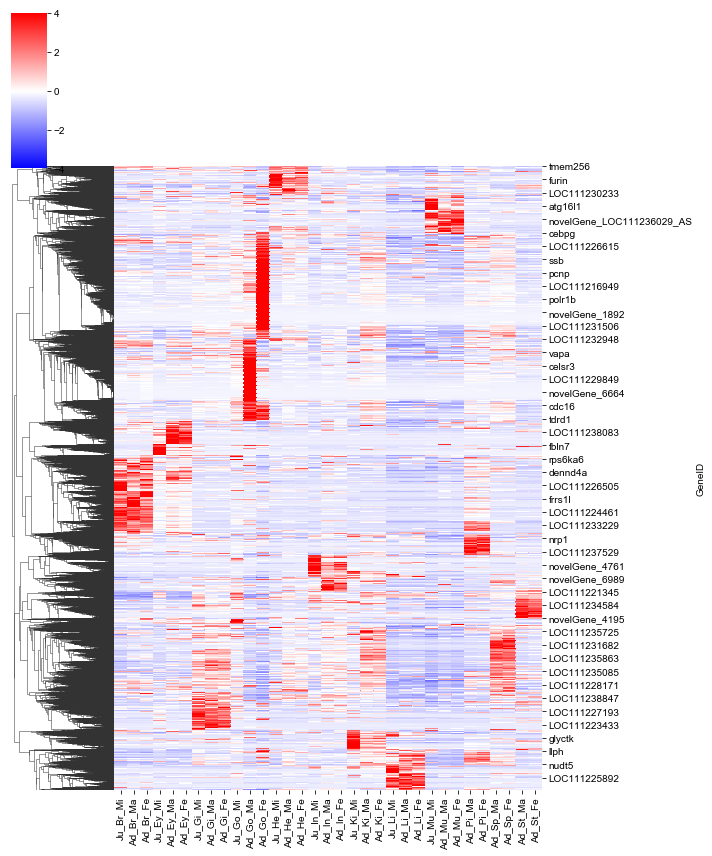

In [124]:
dat1 = dat[dat.max(axis=1) > 10]
ret = sns.clustermap(dat1, z_score=0, col_cluster=False, cmap="bwr", vmin=-4, vmax=4, cbar=True, figsize=(10, 12))

In [4]:
dat = dat[dat.max(axis=1) > 10]
mean = dat.mean(axis=1)
diff = dat.subtract(mean, axis=0)
std = dat.std(axis=1)
zscore = diff.divide(std, axis=0)

# Tissue-specific genes

In [5]:
tissues = []
for c in zscore.columns:
    t = c.split("_")[1]
    if t not in tissues:
        tissues.append(t)
print(tissues)
array = []
for tissue in tissues:
    cs1 = list(filter(lambda item: tissue in item, zscore.columns))
    cs2 = list(filter(lambda item: tissue not in item, zscore.columns))
    d1 = zscore[cs1]
    d2 = zscore[cs2]
    v1 = d1.min(axis=1)
    v2 = d2.max(axis=1) 
    sub = zscore[(v1 > 1) & (v1 - v2 > 1)]
    array.append(sub)
counts = [len(sub) for sub in array]
matrix1 = pd.concat(array)

['Br', 'Ey', 'Gi', 'Go', 'He', 'In', 'Ki', 'Li', 'Mu', 'Pi', 'Sp', 'St']


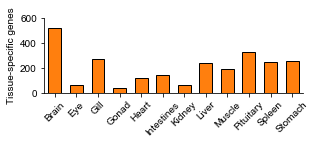

In [14]:
xs = np.arange(len(counts))

plt.figure(figsize=(4.5, 2))
plt.bar(xs, counts, edgecolor="black", color="C1", width=0.6)
plt.xticks(xs, ["Brain", "Eye", "Gill", "Gonad", "Heart", "Intestines", "Kidney", "Liver", "Muscle", "Pituitary", "Spleen", "Stomach"], 
           rotation=45)
plt.ylabel("Tissue-specific genes")
plt.xlim(-0.5, max(xs) + 0.5)
plt.ylim(0, 600)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/tissue_specific_genes.pdf", dpi=300)

# Tissue-specific genes (seperate testis and ovary)

In [128]:
tissues = []
for c in zscore.columns:
    t = c.split("_")[1]
    if t not in tissues:
        tissues.append(t)
print(tissues)
array = []
data = dict()
row_colors = []
for i, tissue in enumerate(tissues):
    cs1 = list(filter(lambda item: tissue in item, zscore.columns))
    cs2 = list(filter(lambda item: tissue not in item, zscore.columns))
    d1 = zscore[cs1]
    d2 = zscore[cs2]
    v1 = d1.min(axis=1)
    v2 = d2.max(axis=1) 
    sub = zscore[(v1 > 1) & (v1 - v2 > 1)]
    array.append(sub)
    data[tissue] = sub
    row_colors.extend(["C%s" % (i % 10)] * len(sub))
counts = [len(sub) for sub in array]
matrix1 = pd.concat(array)

['Br', 'Ey', 'Gi', 'Go', 'He', 'In', 'Ki', 'Li', 'Mu', 'Pi', 'Sp', 'St']


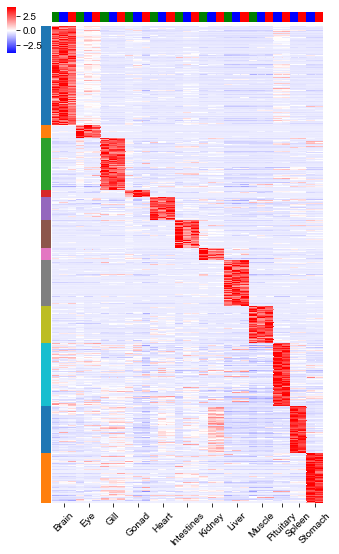

In [151]:
sex_color_mapper = {"Ma": "blue", "Fe": "red", "Mi": "green"}
sex_colors = [sex_color_mapper[g[-2:]] for g in groups]

ret = sns.clustermap(matrix1, cmap="bwr", 
                     row_cluster=False, row_colors=row_colors,
                     col_cluster=False, col_colors=sex_colors, colors_ratio=(0.03, 0.02),
                     dendrogram_ratio=(0.1, 0.005), cbar_pos=(0.02, 0.9, 0.02, 0.08),
                     vmin=-4, vmax=4, figsize=(6, 8))

# ret.fig.axes[0].set_visible(False)

plt.sca(ret.fig.axes[4])
plt.xticks([1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28, 30, 32], 
           ["Brain", "Eye", "Gill", "Gonad", "Heart", "Intestines", "Kidney", "Liver", "Muscle", "Pituitary", "Spleen", "Stomach"], 
           rotation=45)
plt.yticks([])
plt.ylabel(None)

ret.fig.savefig("figures/tissue_specific.clustermap.pdf", dpi=300)

# GO term analysis

In [164]:
for t, d in data.items():
    print(t, len(d), sep="\t")
    path = "results/tissue_specific_genes_zscore.%s.tsv" % t
    d.to_csv(path, sep="\t")
    
    prefix = "results/tissue_specific_genes_goterm.%s" % t
    cmd = "bash /data/chenzonggui/gaotishi/0_Plot_figure/3_profiling_of_expression/run_clusterProfiler.sh %s %s" % (path, prefix)
    assert os.system(cmd) == 0

Br	523
Ey	67
Gi	269
Go	38
He	123
In	144
Ki	64
Li	239
Mu	195
Pi	330
Sp	248
St	257
